In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
flights_info = pd.read_csv('../data/cleaned_data/Flights.csv')
ticket_prices = pd.read_csv('../data/temproary_data/average_ticket_price.csv')

# transform the data
flights_info = flights_info.assign(
        sorted_route=flights_info.apply(
            lambda x: tuple(
                sorted([x["ORIGIN_AIRPORT_IATA_CODE"], x["DEST_AIRPORT_IATA_CODE"]])
            ),
            axis=1,
        )
    )[['sorted_route', 'DISTANCE', 'AIR_TIME']]
ticket_prices['RoundTrip_AIRPORT_IATA_CODE'] = ticket_prices['RoundTrip_AIRPORT_IATA_CODE'].apply(lambda x: eval(x))

# Evaluation on the current calcualted average ticket price

To validate the calculated average ticket price of each roundTrip route, we are going to use information on the distance between the airports of each roundTrip route. It is reasonable to assume that if the roundTrip routes contain airports that far away from each other(long round Trip route), the ticket price will be higher because more unknow factors will impact cost of the trip. As a result, the ticket price will be impacted. <u>**Therefore, we expect our calculated average ticket price per roundtrip round to have a postive correlations with the distance and average travel time of the roundtrip routes**</u>.

To measure the correlation between the ticket price and travel distance as well as te ticket price and travel time, we are going use Pearson Correlation Coefficient. the coefficient range from -1 to 1. If the number is closer to 1 or -1, then there exist a strong correlations

In [64]:
## Merge the data
RoundTrip_info = ticket_prices.merge(flights_info, how = 'inner', left_on='RoundTrip_AIRPORT_IATA_CODE', right_on='sorted_route').drop(columns=['sorted_route', 'avg_ticket_price_perPassenger_roundTrip'])



# finding correlations
print(f"the correlation between distance and ticket price is {RoundTrip_info['DISTANCE'].corr(RoundTrip_info['avg_ticket_price_perPassenger_oneWay'])}")
print(f"the correlation between air time and ticket price is {RoundTrip_info['AIR_TIME'].corr(RoundTrip_info['avg_ticket_price_perPassenger_oneWay'])}")

the correlation between distance and ticket price is 0.410093112389994
the correlation between air time and ticket price is 0.4021427716874365


With pearson correlation of 0.4, the correlations here are moderate. However, it does prove the validatity of calculated average ticket price consider unbalanced ticket price distribution of noise of real data

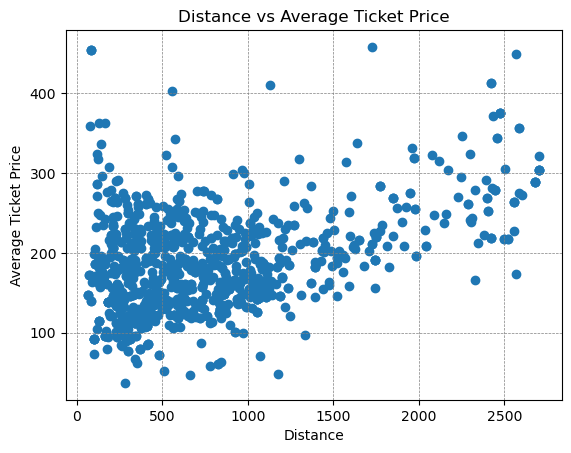

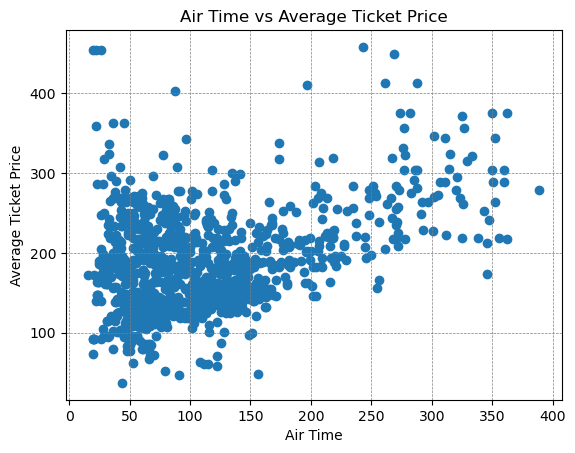

In [95]:
sample_RoundTrip_info = RoundTrip_info.sample(1000, replace=False, random_state=1)

plt.scatter(sample_RoundTrip_info['DISTANCE'], sample_RoundTrip_info['avg_ticket_price_perPassenger_oneWay'])

plt.xlabel('Distance')
plt.ylabel('Average Ticket Price')
plt.title('Distance vs Average Ticket Price')

plt.grid(color = 'gray', 
         linestyle = '--', 
         linewidth = 0.5)

plt.show()

plt.scatter(sample_RoundTrip_info['AIR_TIME'], sample_RoundTrip_info['avg_ticket_price_perPassenger_oneWay'])

plt.xlabel('Air Time')
plt.ylabel('Average Ticket Price')
plt.title('Air Time vs Average Ticket Price')

plt.grid(color = 'gray',
            linestyle = '--',
            linewidth = 0.5)

plt.show()